In [13]:
import pandas, seaborn
data = pandas.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [14]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [15]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [17]:
# In the 'Gender' column,
# change Female to 0 
# and Male to 1


data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [18]:
# Changing the values in 'Index' columns accordingly

bins = (-1, 0, 1, 2, 3, 4, 5)
health = ['Malnourished', 'Skinny', 'Fit', 'Overweight', 'Obese', 'Fat']

data['Index'] = pandas.cut(data['Index'], bins=bins, labels=health)

In [19]:
data['Index'].value_counts()

Fat             198
Obese           130
Fit              69
Overweight       68
Skinny           22
Malnourished     13
Name: Index, dtype: int64

<AxesSubplot:xlabel='Index', ylabel='count'>

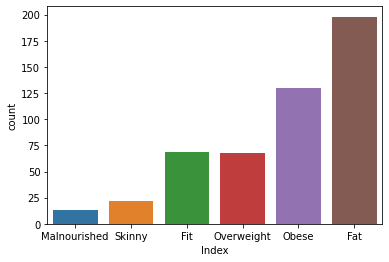

In [20]:
seaborn.countplot(data['Index'])

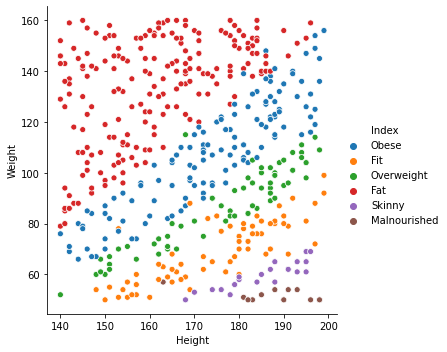

In [21]:
seaborn.relplot(x="Height", y="Weight", hue="Index", data=data)

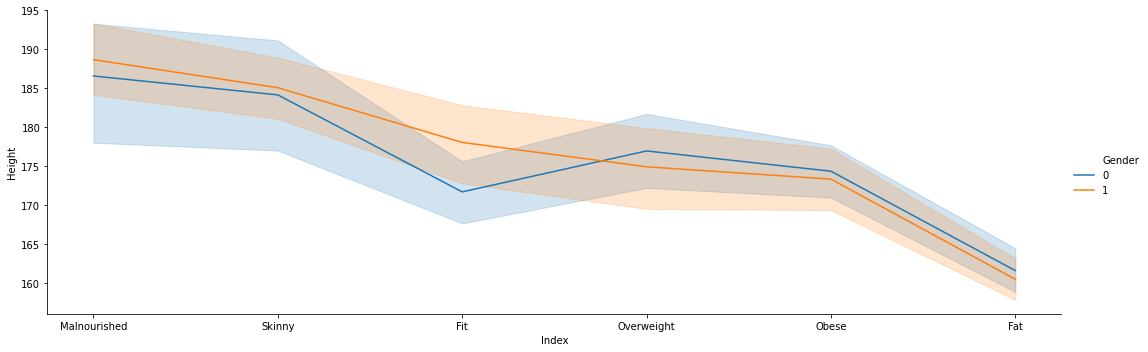

In [22]:
seaborn.relplot(x="Index", y="Height", hue="Gender", data=data, height=5, aspect=3, kind="line")

In [23]:
X = data.drop('Index', axis=1)
Y= data['Index']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [28]:
clf = svm.SVC()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

In [30]:
print(classification_report(Y_test, pred))

precision    recall  f1-score   support

         Fat       0.88      0.97      0.92        36
         Fit       0.73      0.80      0.76        10
Malnourished       0.00      0.00      0.00         3
       Obese       0.96      0.78      0.86        32
  Overweight       0.78      0.93      0.85        15
      Skinny       0.60      0.75      0.67         4

    accuracy                           0.85       100
   macro avg       0.66      0.71      0.68       100
weighted avg       0.84      0.85      0.84       100



In [32]:
print(confusion_matrix(Y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [35]:
print(accuracy_score(Y_test, pred) * 100, '%')

85.0 %


In [38]:
a = [[0, 185, 110]]
a = s.transform(a)
b = clf.predict(a)

print(b)

['Obese']


In [37]:
data

,Gender,Height,Weight,Index
0,1,174,96,Obese
1,1,189,87,Fit
2,0,185,110,Obese
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Fat
496,0,184,121,Obese
497,0,141,136,Fat
498,1,150,95,Fat
